In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns

os.chdir('..')

In [2]:
def power(dict_results): 
    power = {}
    rejections = {}

    for key in dict_results.keys():
        #print(key)
        rejections[key] = 0
        for i in range(len(dict_results[key])):
            if dict_results[key][i][0] > dict_results[key][i][1]:
                rejections[key] += 1
            else:
                pass
        # statistical power
        power[key] = 100 * rejections[key] / len(dict_results[key])
    
    power_df = pd.DataFrame.from_dict(data=power, orient='index').reset_index()
    power_df0 = power_df['index'].apply(pd.Series)
    power_df1 = pd.concat([power_df0, power_df], axis=1, ignore_index=True).drop([4], axis=1)
    power_df2 = power_df1.rename(columns={0: 'dimension', 1: 'sample_size', 2: 'shift', 3: 'test', 5: 'power'}).sort_values(by=['sample_size', 'shift', 'test'], axis=0)
   
    return power_df2

In [3]:
# confidence intervals
def confidence(mean):
    interval = 1.96 * np.sqrt((mean * (100 - mean)) / 100)
    return interval

# MMD

## Mean shift

To compute the statistical power, we take the 200 reputations for every configuration written in the keys and compute the probability of rejection, given the null hypothesis is false.

$H_0: P_X = P_Y$

### Comparison of our results to Pomann et al. (2016)

In [4]:
path = 'high_MMD_mean'
test_ = 'p'  # 'p' g
dim = 100

file = 'mean_shifts_{}_[{}]'.format(test_, dim)

dict_results = pickle.load(open('{}/{}.pkl'.format(path, file), 'rb'))

In [5]:
def power_mmd(dict_results):
    power = {}
    rejections = {}

    for key in dict_results.keys():
        #print(key)
        rejections[key] = 0
        for i in range(len(dict_results[key])):
            if dict_results[key][i][0] > dict_results[key][i][1]:
                rejections[key] += 1
            else:
                pass
        # statistical power
        power[key] = 100 * rejections[key] / len(dict_results[key])
    
    power_df = pd.DataFrame.from_dict(data=power, orient='index').reset_index()
    power_df0 = power_df['index'].apply(pd.Series)
    power_df1 = pd.concat([power_df0, power_df], axis=1, ignore_index=True).drop([4], axis=1)
    power_df2 = power_df1.rename(columns={0: 'dimension', 1: 'sample_size', 2: 'delta', 5: 'power'}).sort_values(by=['sample_size', 'delta'], axis=0)
    
    return power_df2

In [6]:
power_df2 = power_mmd(dict_results)

sample_100 = power_df2[power_df2['sample_size']==100]
sample_200 = power_df2[power_df2['sample_size']==200]
sample_300 = power_df2[power_df2['sample_size']==300]
sample_500 = power_df2[power_df2['sample_size']==500]

Comparing to Pomann et al. (2016) with values read out by [online tool](https://apps.automeris.io/wpd/).

In [7]:
# comparison data (Pomann et al. 2016) -> only tested d = 100
x_delta = np.asarray([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
x_100_po, y_100_po = x_delta, np.asarray([5, 6, 7.5, 10, 14, 20, 30, 36, 51, 62, 70, 79, 98, 100])
x_200_po, y_200_po = x_delta, np.asarray([5, 6, 10, 16, 26, 36, 51, 65, 76, 88, 93, 98, 100, 100])
x_300_po, y_300_po = x_delta, np.asarray([5, 7, 12, 23, 34, 50, 71, 83, 92, 98, 99, 100, 100, 100])
x_500_po, y_500_po = x_delta, np.asarray([5, 8, 18, 30, 52, 76, 89, 96, 99, 100, 100, 100, 100, 100])

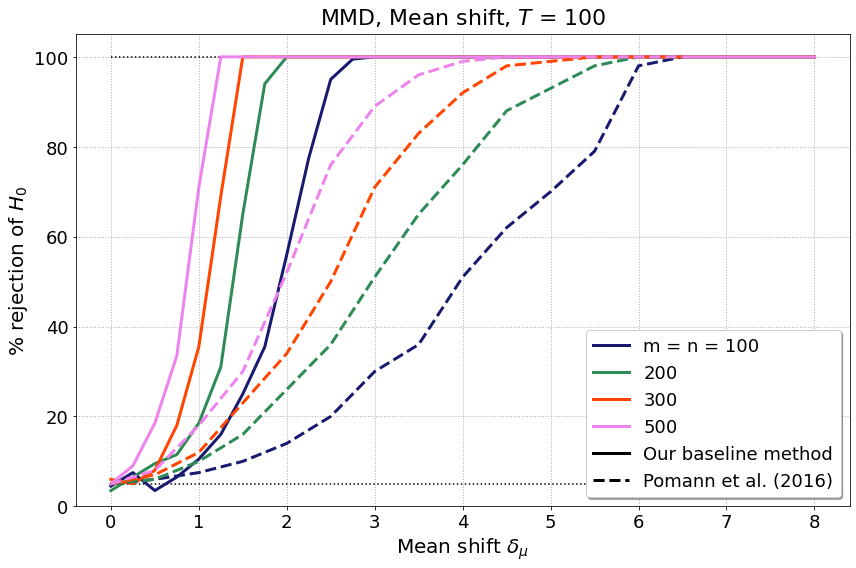

In [8]:
# plotting to compare to Pomann

x_100, y_100 = sample_100['delta'], sample_100['power']
x_200, y_200 = sample_200['delta'], sample_200['power']
x_300, y_300 = sample_300['delta'], sample_300['power']
x_500, y_500 = sample_500['delta'], sample_500['power']

plt.figure(figsize=(12, 8))
plt.xlabel(r'Mean shift $\delta_{\mu}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.title(r'MMD, Mean shift, $T$ = {}'.format(dim), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.plot(x_100, y_100, 'midnightblue', linewidth=3)
plt.plot(x_200, y_200, 'seagreen', linewidth=3)
plt.plot(x_300, y_300, 'orangered', linewidth=3)
plt.plot(x_500, y_500, 'violet', linewidth=3)

# comparison to Pomann et al. (2016)
plt.plot(x_100_po, y_100_po, 'midnightblue', linewidth=3, linestyle='dashed')
plt.plot(x_200_po, y_200_po, 'seagreen', linewidth=3, linestyle='dashed')
plt.plot(x_300_po, y_300_po, 'orangered', linewidth=3, linestyle='dashed')
plt.plot(x_500_po, y_500_po, 'violet', linewidth=3, linestyle='dashed')

# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='midnightblue', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='seagreen', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='seagreen', lw=2, linestyle='dashed')
                 Line2D([0], [0], color='orangered', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='orangered', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='violet', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='violet', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='k', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dashed')]
                                                                      
plt.legend(custom_legend, ['m = n = 100', '200', '300', '500', 'Our baseline method', 'Pomann et al. (2016)'], loc=4, fontsize=18, framealpha=1, shadow=True)
plt.tight_layout()
plt.savefig('visuals/mean_{}_{}.png'.format(dim, test_))
plt.show()

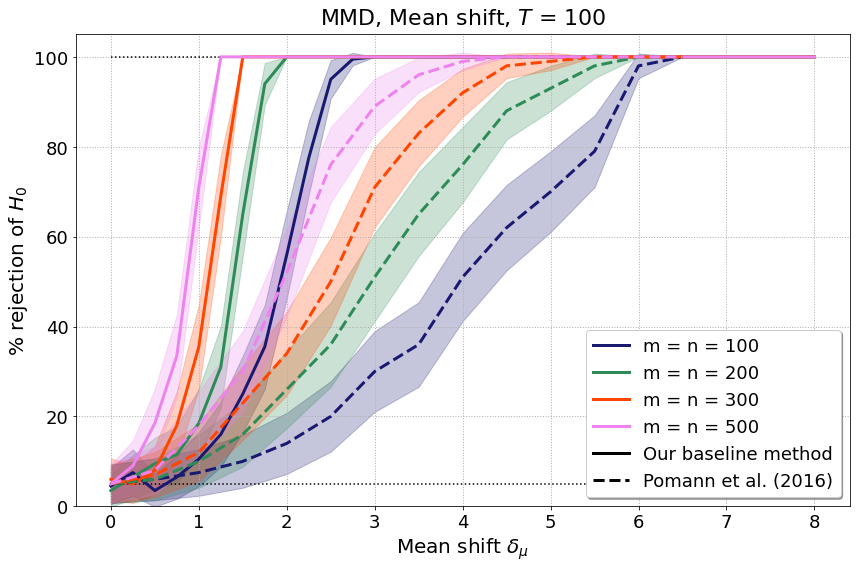

In [9]:
# plotting to compare to Pomann

x_100, y_100 = sample_100['delta'], sample_100['power']
x_200, y_200 = sample_200['delta'], sample_200['power']
x_300, y_300 = sample_300['delta'], sample_300['power']
x_500, y_500 = sample_500['delta'], sample_500['power']

plt.figure(figsize=(12, 8))
plt.xlabel(r'Mean shift $\delta_{\mu}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.title(r'MMD, Mean shift, $T$ = {}'.format(dim), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.plot(x_100, y_100, 'midnightblue', linewidth=3)
plt.plot(x_200, y_200, 'seagreen', linewidth=3)
plt.plot(x_300, y_300, 'orangered', linewidth=3)
plt.plot(x_500, y_500, 'violet', linewidth=3)

# error bars
error_100 = confidence(y_100)
error_200 = confidence(y_200)
error_300 = confidence(y_300)
error_500 = confidence(y_500)

plt.fill_between(x_100, y_100-error_100, y_100+error_100, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200, y_200-error_200, y_200+error_200, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_300, y_300-error_300, y_300+error_300, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_500, y_500-error_500, y_500+error_500, interpolate=True, alpha=0.25, color='violet')

# comparison to Pomann et al. (2016)
plt.plot(x_100_po, y_100_po, 'midnightblue', linewidth=3, linestyle='dashed')
plt.plot(x_200_po, y_200_po, 'seagreen', linewidth=3, linestyle='dashed')
plt.plot(x_300_po, y_300_po, 'orangered', linewidth=3, linestyle='dashed')
plt.plot(x_500_po, y_500_po, 'violet', linewidth=3, linestyle='dashed')

# error bars
error_100_po = confidence(y_100_po)
error_200_po = confidence(y_200_po)
error_300_po = confidence(y_300_po)
error_500_po = confidence(y_500_po)

plt.fill_between(x_100_po, y_100_po-error_100_po, y_100_po+error_100_po, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200_po, y_200_po-error_200_po, y_200_po+error_200_po, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_300_po, y_300_po-error_300_po, y_300_po+error_300_po, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_500_po, y_500_po-error_500_po, y_500_po+error_500_po, interpolate=True, alpha=0.25, color='violet')

# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='midnightblue', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='seagreen', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='seagreen', lw=2, linestyle='dashed')
                 Line2D([0], [0], color='orangered', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='orangered', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='violet', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='violet', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='k', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dashed')]
                                                                      
plt.legend(custom_legend, ['m = n = 100', 'm = n = 200', 'm = n = 300', 'm = n = 500', 'Our baseline method', 'Pomann et al. (2016)'], loc=4, fontsize=18, framealpha=1, shadow=True)
plt.tight_layout()
plt.savefig('visuals/mean_{}_{}_conf.png'.format(dim, test_))
plt.show()

## Test power maximisation

In [10]:
path = 'high_MMD_mean'
test_ = 'p'  # 'p' g
dim = 100

file = 'mean_shifts_{}_[{}]_max'.format(test_, dim)

dict_results_max = pickle.load(open('{}/{}.pkl'.format(path, file), 'rb'))

In [11]:
dict_results_100 = {}
dict_results_200 = {}

for key, value in dict_results_max.items():
    if key[1]==100:
        dict_results_100[key] = value
    elif key[1]==200:
        dict_results_200[key] = value

In [12]:
def power_mmd_max(dict_results):
    power = {}
    rejections = {}

    for key in dict_results.keys():
        #print(key)
        rejections[key] = 0
        for i in range(len(dict_results[key])):
            if dict_results[key][i][0] > dict_results[key][i][1]:
                rejections[key] += 1
            else:
                pass
        # statistical power
        power[key] = 100 * rejections[key] / len(dict_results[key])
    
    power_df = pd.DataFrame.from_dict(data=power, orient='index').reset_index()
    power_df0 = power_df['index'].apply(pd.Series)
    power_df1 = pd.concat([power_df0, power_df], axis=1, ignore_index=True).drop([3], axis=1)
    power_df2 = power_df1.rename(columns={0: 'dimension', 1: 'sample_size', 2: 'delta', 4: 'power'}).sort_values(by=['sample_size', 'delta'], axis=0)
    
    return power_df2

In [13]:
power_df2_max_100 = power_mmd_max(dict_results_100)
power_df2_max_200 = power_mmd_max(dict_results_200)

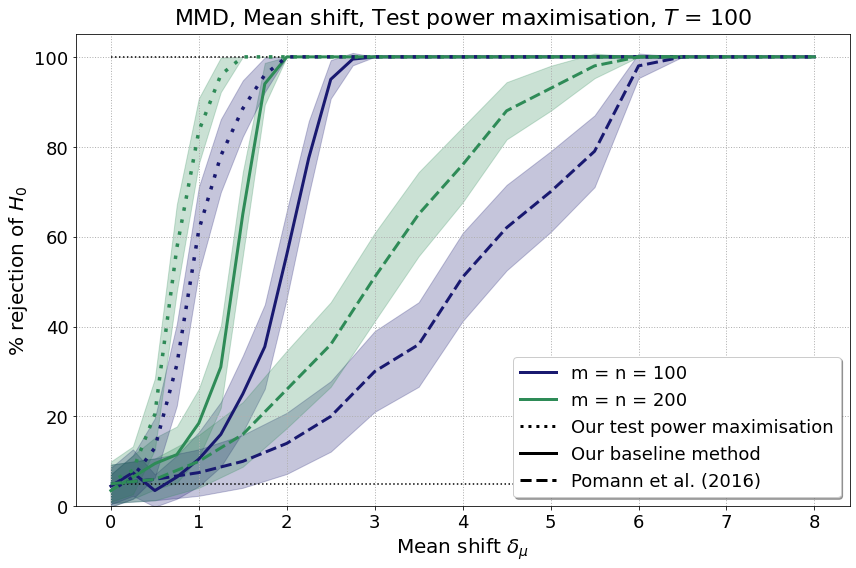

In [14]:
# plotting to compare to max test power

x_100, y_100 = sample_100['delta'], sample_100['power']
x_200, y_200 = sample_200['delta'], sample_200['power']

x_100_max, y_100_max = power_df2_max_100['delta'], power_df2_max_100['power']
x_200_max, y_200_max = power_df2_max_200['delta'], power_df2_max_200['power']

plt.figure(figsize=(12, 8))
plt.xlabel(r'Mean shift $\delta_{\mu}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.title(r'MMD, Mean shift, Test power maximisation, $T$ = {}'.format(dim), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

# baseline
plt.plot(x_100, y_100, 'midnightblue', linewidth=3)
plt.plot(x_200, y_200, 'seagreen', linewidth=3)
# error bars
error_100 = confidence(y_100)
error_200 = confidence(y_200)
plt.fill_between(x_100, y_100-error_100, y_100+error_100, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200, y_200-error_200, y_200+error_200, interpolate=True, alpha=0.25, color='seagreen')

# comparison to test maxwer maximisation
plt.plot(x_100_max, y_100_max, 'midnightblue', linewidth=3.5, linestyle=(1, (1, 2.5)))
plt.plot(x_200_max, y_200_max, 'seagreen', linewidth=3.5, linestyle=(1, (1, 2.5)))
# error bars
error_100_max = confidence(y_100_max)
error_200_max = confidence(y_200_max)
plt.fill_between(x_100_max, y_100_max-error_100_max, y_100_max+error_100_max, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200_max, y_200_max-error_200_max, y_200_max+error_200_max, interpolate=True, alpha=0.25, color='seagreen')

# comparison to Pomann et al. (2016)
plt.plot(x_100_po, y_100_po, 'midnightblue', linewidth=3, linestyle='dashed')
plt.plot(x_200_po, y_200_po, 'seagreen', linewidth=3, linestyle='dashed')
# error bars
error_100_po = confidence(y_100_po)
error_200_po = confidence(y_200_po)
plt.fill_between(x_100_po, y_100_po-error_100_po, y_100_po+error_100_po, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200_po, y_200_po-error_200_po, y_200_po+error_200_po, interpolate=True, alpha=0.25, color='seagreen')

# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='seagreen', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dotted'),
                 Line2D([0], [0], color='k', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dashed')]
                                                                      
plt.legend(custom_legend, ['m = n = 100', 'm = n = 200', 'Our test power maximisation', 'Our baseline method', 'Pomann et al. (2016)'], loc=4, fontsize=18, framealpha=1, shadow=True)
plt.tight_layout()
plt.savefig('visuals/mean_{}_{}_conf_max.png'.format(dim, test_))
plt.show()

### All dimensions in one plot

In [15]:
path = 'high_MMD_mean'
test_ = 'p'  # 'p' g
sample_size = 100

# prepare data
file_5 = 'mean_shifts_{}_[{}]'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power_mmd(dict_results_5)
sample_5 = power_df2_5[power_df2_5['sample_size']==sample_size]

file_10 = 'mean_shifts_{}_[{}]'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power_mmd(dict_results_10)
sample_10 = power_df2_10[power_df2_10['sample_size']==sample_size]

file_25 = 'mean_shifts_{}_[{}]'.format(test_, 25)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power_mmd(dict_results_25)
sample_25 = power_df2_25[power_df2_25['sample_size']==sample_size]

file_50 = 'mean_shifts_{}_[{}]'.format(test_, 50)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power_mmd(dict_results_50)
sample_50 = power_df2_50[power_df2_50['sample_size']==sample_size]

file_100 = 'mean_shifts_{}_[{}]'.format(test_, 100)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power_mmd(dict_results_100)
sample_100 = power_df2_100[power_df2_100['sample_size']==sample_size]

In [16]:
x_5, y_5 = sample_5['delta'], sample_5['power']
x_10, y_10 = sample_10['delta'], sample_10['power']
x_25, y_25 = sample_25['delta'], sample_25['power']
x_50, y_50 = sample_50['delta'], sample_50['power']
x_100, y_100 = sample_100['delta'], sample_100['power']

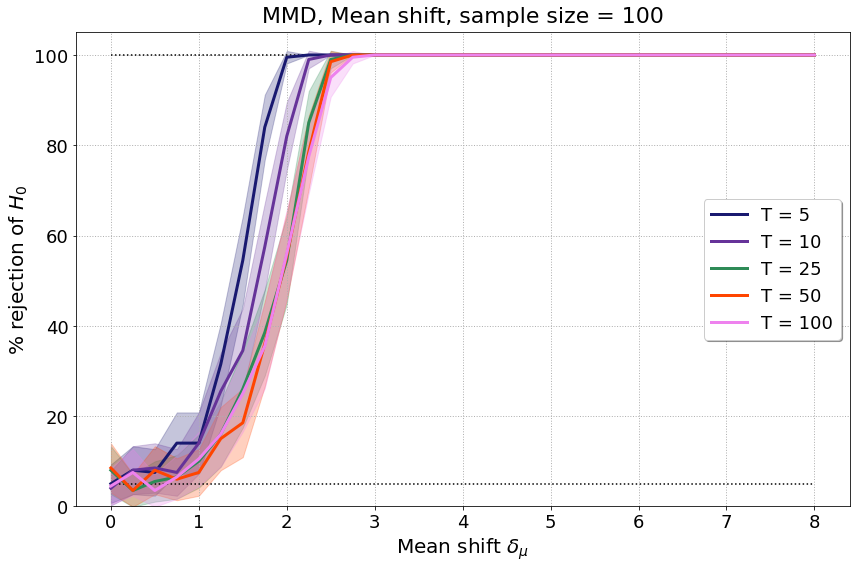

In [17]:
# plotting to see performance of different dimensions for sample size = 100

plt.figure(figsize=(12, 8))
plt.xlabel(r'Mean shift $\delta_{\mu}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=8, colors='k', linestyles='dotted')
plt.title('MMD, Mean shift, sample size = {}'.format(sample_size), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

# results
plt.plot(x_5, y_5, 'midnightblue', lw=3, linestyle='solid')
plt.plot(x_10, y_10, 'rebeccapurple', lw=3, linestyle='solid')
plt.plot(x_25, y_25, 'seagreen', lw=3, linestyle='solid')
plt.plot(x_50, y_50, 'orangered', lw=3, linestyle='solid')
plt.plot(x_100, y_100, 'violet', lw=3, linestyle='solid')

error_5 = confidence(y_5)
error_10 = confidence(y_10)
error_25 = confidence(y_25)
error_50 = confidence(y_50)
error_100 = confidence(y_100)

plt.fill_between(x_5, y_5-error_5, y_5+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_10, y_10-error_10, y_10+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x_25, y_25-error_25, y_25+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_50, y_50-error_50, y_50+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_100, y_100-error_100, y_100+error_100, interpolate=True, alpha=0.25, color='violet')

plt.legend(['T = 5', 'T = 10', 'T = 25', 'T = 50', 'T = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()
plt.savefig("visuals/mean_all_{}_{}.png".format(test_, sample_size))

plt.show()

## Variance shift

To compute the statistical power, we take the 200 reputations for every configuration written in the keys and compute the probability of rejection, given the null hypothesis is false.

$H_0: P_X = P_Y$

### Comparison of our results to Pomann et al. (2016)

In [18]:
path = 'high_MMD_var'
test_ = 'p'  # 'p' g
dim = 100

file = 'var_shifts_{}_[{}]'.format(test_, dim)

dict_results = pickle.load(open('{}/{}.pkl'.format(path, file), 'rb'))

In [19]:
power_df2 = power_mmd(dict_results)

sample_100 = power_df2[power_df2['sample_size']==100]
sample_200 = power_df2[power_df2['sample_size']==200]
sample_300 = power_df2[power_df2['sample_size']==300]
sample_500 = power_df2[power_df2['sample_size']==500]

In [20]:
# comparison data (Pomann et al. 2016) -> only tested d = 100

po_100 = np.loadtxt('comparison_results/Pomann/MMD_var_shift_100.csv', delimiter=',')
x_100_po, y_100_po = po_100[:, 0], po_100[:, 1]

po_200 = np.loadtxt('comparison_results/Pomann/MMD_var_shift_200.csv', delimiter=',')
x_200_po, y_200_po = po_200[:, 0], po_200[:, 1]

po_300 = np.loadtxt('comparison_results/Pomann/MMD_var_shift_300.csv', delimiter=',')
x_300_po, y_300_po = po_300[:, 0], po_300[:, 1]

po_500 = np.loadtxt('comparison_results/Pomann/MMD_var_shift_500.csv', delimiter=',')
x_500_po, y_500_po = po_500[:, 0], po_500[:, 1]

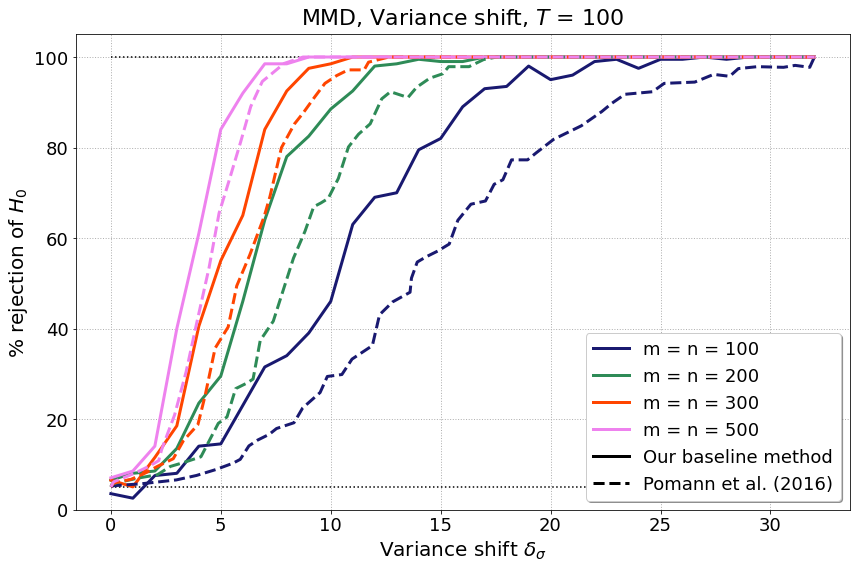

In [21]:
# plotting to compare to Pomann

x_100, y_100 = sample_100['delta'], sample_100['power']
x_200, y_200 = sample_200['delta'], sample_200['power']
x_300, y_300 = sample_300['delta'], sample_300['power']
x_500, y_500 = sample_500['delta'], sample_500['power']

plt.figure(figsize=(12, 8))
plt.xlabel(r'Variance shift $\delta_{\sigma}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.title(r'MMD, Variance shift, $T$ = {}'.format(dim), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.plot(x_100, y_100, 'midnightblue', linewidth=3)
plt.plot(x_200, y_200, 'seagreen', linewidth=3)
plt.plot(x_300, y_300, 'orangered', linewidth=3)
plt.plot(x_500, y_500, 'violet', linewidth=3)

# comparison to Pomann et al. (2016)
plt.plot(x_100_po, y_100_po, 'midnightblue', linewidth=3, linestyle='dashed')
plt.plot(x_200_po, y_200_po, 'seagreen', linewidth=3, linestyle='dashed')
plt.plot(x_300_po, y_300_po, 'orangered', linewidth=3, linestyle='dashed')
plt.plot(x_500_po, y_500_po, 'violet', linewidth=3, linestyle='dashed')

# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='midnightblue', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='seagreen', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='seagreen', lw=2, linestyle='dashed')
                 Line2D([0], [0], color='orangered', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='orangered', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='violet', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='violet', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='k', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dashed')]
                                                                      
plt.legend(custom_legend, ['m = n = 100', 'm = n = 200', 'm = n = 300', 'm = n = 500', 'Our baseline method', 'Pomann et al. (2016)'], loc=4, fontsize=18, framealpha=1, shadow=True)

plt.tight_layout()
plt.savefig('visuals/var_{}_{}.png'.format(dim, test_))
plt.show()

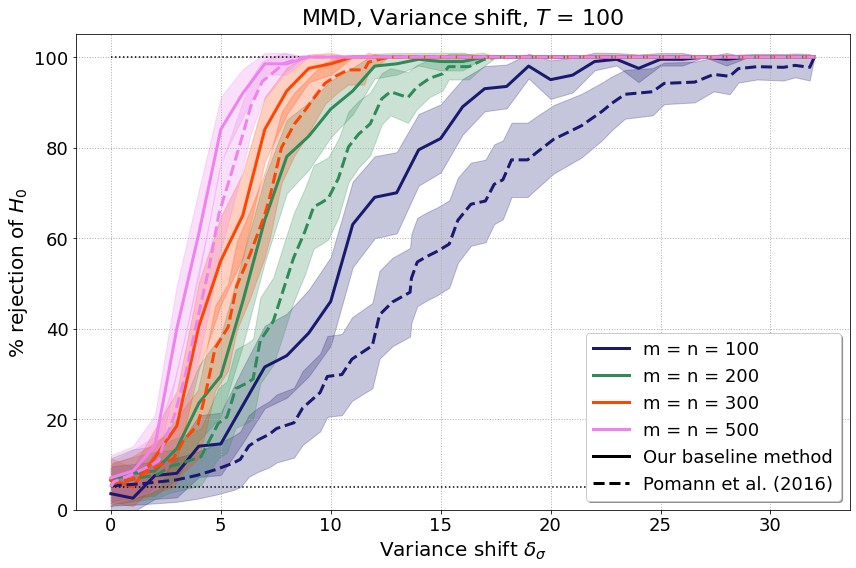

In [22]:
# plotting to compare to Pomann

x_100, y_100 = sample_100['delta'], sample_100['power']
x_200, y_200 = sample_200['delta'], sample_200['power']
x_300, y_300 = sample_300['delta'], sample_300['power']
x_500, y_500 = sample_500['delta'], sample_500['power']

plt.figure(figsize=(12, 8))
plt.xlabel(r'Variance shift $\delta_{\sigma}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.title(r'MMD, Variance shift, $T$ = {}'.format(dim), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.plot(x_100, y_100, 'midnightblue', linewidth=3)
plt.plot(x_200, y_200, 'seagreen', linewidth=3)
plt.plot(x_300, y_300, 'orangered', linewidth=3)
plt.plot(x_500, y_500, 'violet', linewidth=3)

# error bars
error_100 = confidence(y_100)
error_200 = confidence(y_200)
error_300 = confidence(y_300)
error_500 = confidence(y_500)

plt.fill_between(x_100, y_100-error_100, y_100+error_100, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200, y_200-error_200, y_200+error_200, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_300, y_300-error_300, y_300+error_300, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_500, y_500-error_500, y_500+error_500, interpolate=True, alpha=0.25, color='violet')

# comparison to Pomann et al. (2016)
plt.plot(x_100_po, y_100_po, 'midnightblue', linewidth=3, linestyle='dashed')
plt.plot(x_200_po, y_200_po, 'seagreen', linewidth=3, linestyle='dashed')
plt.plot(x_300_po, y_300_po, 'orangered', linewidth=3, linestyle='dashed')
plt.plot(x_500_po, y_500_po, 'violet', linewidth=3, linestyle='dashed')

# error bars
error_100_po = confidence(y_100_po)
error_200_po = confidence(y_200_po)
error_300_po = confidence(y_300_po)
error_500_po = confidence(y_500_po)

plt.fill_between(x_100_po, y_100_po-error_100_po, y_100_po+error_100_po, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200_po, y_200_po-error_200_po, y_200_po+error_200_po, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_300_po, y_300_po-error_300_po, y_300_po+error_300_po, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_500_po, y_500_po-error_500_po, y_500_po+error_500_po, interpolate=True, alpha=0.25, color='violet')


# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='midnightblue', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='seagreen', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='seagreen', lw=2, linestyle='dashed')
                 Line2D([0], [0], color='orangered', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='orangered', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='violet', lw=3, linestyle='solid'),
                 #Line2D([0], [0], color='violet', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='k', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dashed')]
                                                                      
plt.legend(custom_legend, ['m = n = 100', 'm = n = 200', 'm = n = 300', 'm = n = 500', 'Our baseline method', 'Pomann et al. (2016)'], loc=4, fontsize=18, framealpha=1, shadow=True)

plt.tight_layout()
plt.savefig('visuals/var_{}_{}_conf.png'.format(dim, test_))
plt.show()

## Test power maximisation

In [23]:
# prepare results of maximisation
path = 'high_MMD_var/max'
test_ = 'p'  # 'p' g

# prepare data

sample_size = 100
file_1 = 'var_shifts_p_100_{}_max_1'.format(sample_size)
dict_results_1 = pickle.load(open('{}/{}.pkl'.format(path, file_1), 'rb'))
file_2 = 'var_shifts_p_100_{}_max_2'.format(sample_size)
dict_results_2 = pickle.load(open('{}/{}.pkl'.format(path, file_2), 'rb'))
file_3 = 'var_shifts_p_100_{}_max_3'.format(sample_size)
dict_results_3 = pickle.load(open('{}/{}.pkl'.format(path, file_3), 'rb'))
dict_100 = {**dict_results_1, **dict_results_2, **dict_results_3}

sample_size = 200
file_1 = 'var_shifts_p_100_{}_max_1'.format(sample_size)
dict_results_1 = pickle.load(open('{}/{}.pkl'.format(path, file_1), 'rb'))
file_2 = 'var_shifts_p_100_{}_max_2'.format(sample_size)
dict_results_2 = pickle.load(open('{}/{}.pkl'.format(path, file_2), 'rb'))
file_3 = 'var_shifts_p_100_{}_max_3'.format(sample_size)
dict_results_3 = pickle.load(open('{}/{}.pkl'.format(path, file_3), 'rb'))
dict_200 = {**dict_results_1, **dict_results_2, **dict_results_3}

power_df2_max_100 = power_mmd_max(dict_100)
power_df2_max_200 = power_mmd_max(dict_200)

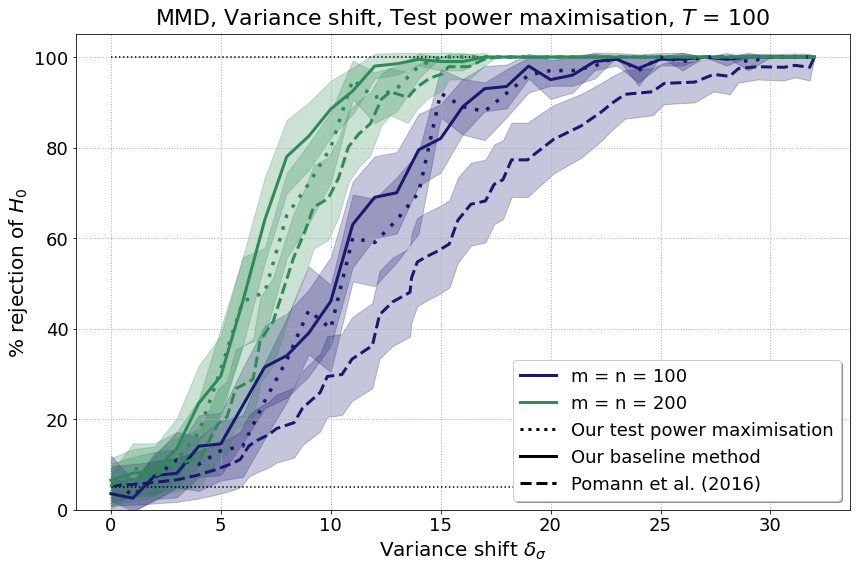

In [24]:
# plotting to compare to max test power

x_100, y_100 = sample_100['delta'], sample_100['power']
x_200, y_200 = sample_200['delta'], sample_200['power']

x_100_max, y_100_max = power_df2_max_100['delta'], power_df2_max_100['power']
x_200_max, y_200_max = power_df2_max_200['delta'], power_df2_max_200['power']

plt.figure(figsize=(12, 8))
plt.xlabel(r'Variance shift $\delta_{\sigma}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.title(r'MMD, Variance shift, Test power maximisation, $T$ = {}'.format(dim), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

# baseline
plt.plot(x_100, y_100, 'midnightblue', linewidth=3)
plt.plot(x_200, y_200, 'seagreen', linewidth=3)
# error bars
error_100 = confidence(y_100)
error_200 = confidence(y_200)
plt.fill_between(x_100, y_100-error_100, y_100+error_100, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200, y_200-error_200, y_200+error_200, interpolate=True, alpha=0.25, color='seagreen')

# comparison to test power maximisation
plt.plot(x_100_max, y_100_max, 'midnightblue', linewidth=3.5, linestyle=(1, (1, 2.5)))
plt.plot(x_200_max, y_200_max, 'seagreen', linewidth=3.5, linestyle=(1, (1, 2.5)))
# error bars
error_100_max = confidence(y_100_max)
error_200_max = confidence(y_200_max)
plt.fill_between(x_100_max, y_100_max-error_100_max, y_100_max+error_100_max, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200_max, y_200_max-error_200_max, y_200_max+error_200_max, interpolate=True, alpha=0.25, color='seagreen')

# comparison to Pomann et al. (2016)
plt.plot(x_100_po, y_100_po, 'midnightblue', linewidth=3, linestyle='dashed')
plt.plot(x_200_po, y_200_po, 'seagreen', linewidth=3, linestyle='dashed')
# error bars
error_100_po = confidence(y_100_po)
error_200_po = confidence(y_200_po)
plt.fill_between(x_100_po, y_100_po-error_100_po, y_100_po+error_100_po, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_200_po, y_200_po-error_200_po, y_200_po+error_200_po, interpolate=True, alpha=0.25, color='seagreen')

# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='seagreen', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dotted'),
                 Line2D([0], [0], color='k', lw=3, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=3, linestyle='dashed')]
                                                                      
plt.legend(custom_legend, ['m = n = 100', 'm = n = 200', 'Our test power maximisation', 'Our baseline method', 'Pomann et al. (2016)'], loc=4, fontsize=18, framealpha=1, shadow=True)
plt.tight_layout()
plt.savefig('visuals/var_{}_{}_conf_max.png'.format(dim, test_))
plt.show()

### All dimensions in one plot

In [25]:
path = 'high_MMD_var'
test_ = 'p'  # 'p' g
sample_size = 100

# prepare data
file_5 = 'var_shifts_{}_[{}]'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power_mmd(dict_results_5)
sample_5 = power_df2_5[power_df2_5['sample_size']==sample_size]

file_10 = 'var_shifts_{}_[{}]'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power_mmd(dict_results_10)
sample_10 = power_df2_10[power_df2_10['sample_size']==sample_size]

file_25 = 'var_shifts_{}_[{}]'.format(test_, 25)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power_mmd(dict_results_25)
sample_25 = power_df2_25[power_df2_25['sample_size']==sample_size]

file_50 = 'var_shifts_{}_[{}]'.format(test_, 50)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power_mmd(dict_results_50)
sample_50 = power_df2_50[power_df2_50['sample_size']==sample_size]

file_100 = 'var_shifts_{}_[{}]'.format(test_, 100)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power_mmd(dict_results_100)
sample_100 = power_df2_100[power_df2_100['sample_size']==sample_size]

In [26]:
x_5, y_5 = sample_5['delta'], sample_5['power']
x_10, y_10 = sample_10['delta'], sample_10['power']
x_25, y_25 = sample_25['delta'], sample_25['power']
x_50, y_50 = sample_50['delta'], sample_50['power']
x_100, y_100 = sample_100['delta'], sample_100['power']

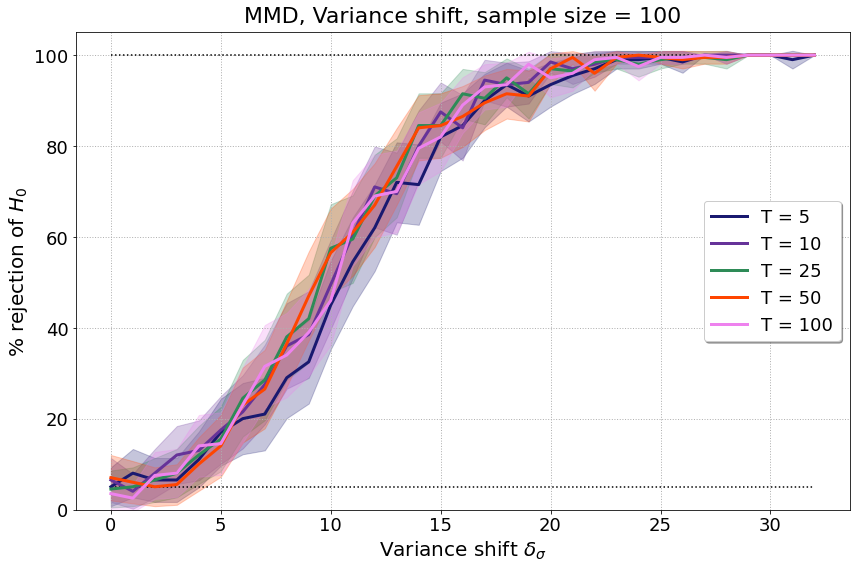

In [27]:
# plotting to see performance of different dimensions for sample size = 100

plt.figure(figsize=(12, 8))
plt.xlabel('Variance shift $\delta_{\sigma}$', size=20)
plt.ylabel(r'$\%$ rejection of $H_0$', size=20)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=32, colors='k', linestyles='dotted')
plt.title('MMD, Variance shift, sample size = {}'.format(sample_size), size=22, pad=10)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

# results
plt.plot(x_5, y_5, 'midnightblue', lw=3, linestyle='solid')
plt.plot(x_10, y_10, 'rebeccapurple', lw=3, linestyle='solid')
plt.plot(x_25, y_25, 'seagreen', lw=3, linestyle='solid')
plt.plot(x_50, y_50, 'orangered', lw=3, linestyle='solid')
plt.plot(x_100, y_100, 'violet', lw=3, linestyle='solid')

error_5 = confidence(y_5)
error_10 = confidence(y_10)
error_25 = confidence(y_25)
error_50 = confidence(y_50)
error_100 = confidence(y_100)

plt.fill_between(x_5, y_5-error_5, y_5+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_10, y_10-error_10, y_10+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x_25, y_25-error_25, y_25+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_50, y_50-error_50, y_50+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_100, y_100-error_100, y_100+error_100, interpolate=True, alpha=0.25, color='violet')

plt.legend(['T = 5', 'T = 10', 'T = 25', 'T = 50', 'T = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()
plt.savefig("visuals/var_all_{}_{}.png".format(test_, sample_size))

plt.show()

# HSIC
To check the statistical power, we take the 500 reputations for every configuration written in the keys and compute the probability of rejection, given the null hypothesis is false.

$H_0: P_{XY} = P_X P_Y$

## Linear dependence 

In [28]:
# comparison results
path = 'comparison_results/kerpy/results'
test_ = 'p'
test__ = 'permutation' # 'permutation' # Gamma

In [29]:
# SubHSIC
file_5 = 'dependencies_{}_SubHSIC_{}_dependence_linear'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power(dict_results_5)
dep_linear5_hsic = power_df2_5[(power_df2_5['test']=='dependence_linear') & (power_df2_5['shift']==0)]

file_10 = 'dependencies_{}_SubHSIC_{}_dependence_linear'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power(dict_results_10)
dep_linear10_hsic = power_df2_10[(power_df2_10['test']=='dependence_linear') & (power_df2_10['shift']==0)]

#SubCorr
file_5 = 'dependencies_{}_SubCorr_{}_dependence_linear'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power(dict_results_5)
dep_linear5_corr = power_df2_5[(power_df2_5['test']=='dependence_linear') & (power_df2_5['shift']==0)]

file_10 = 'dependencies_{}_SubCorr_{}_dependence_linear'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power(dict_results_10)
dep_linear10_corr = power_df2_10[(power_df2_10['test']=='dependence_linear') & (power_df2_10['shift']==0)]

x5_hsic, y5_hsic = dep_linear5_hsic['sample_size'], dep_linear5_hsic['power']
x10_hsic, y10_hsic = dep_linear10_hsic['sample_size'], dep_linear10_hsic['power']

x5_corr, y5_corr = dep_linear5_corr['sample_size'], dep_linear5_corr['power']
x10_corr, y10_corr = dep_linear10_corr['sample_size'], dep_linear10_corr['power']

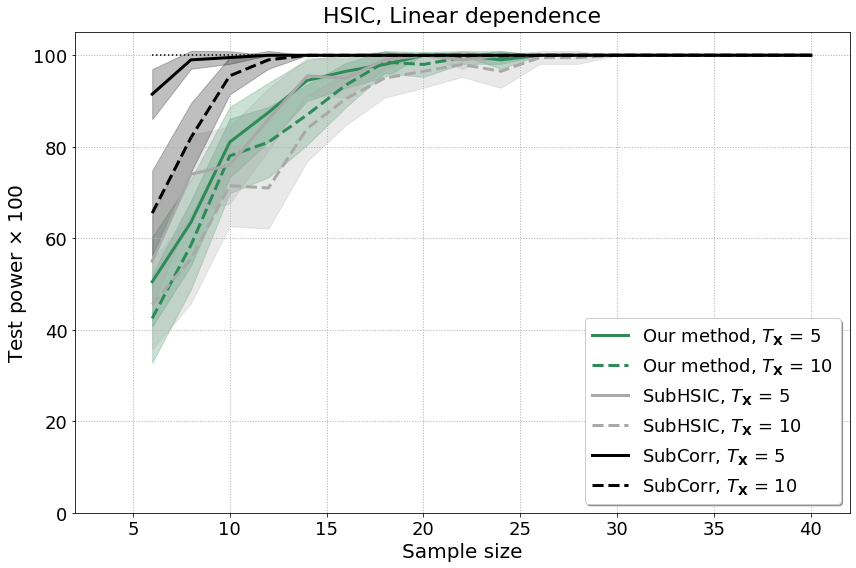

In [31]:
# define folder and file
path = 'high_HSIC'
test_ = 'p'
test__ = 'permutation' # 'permutation' # Gamma

# prepare data
file_5 = 'dependencies_{}_{}_dependence_linear'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power(dict_results_5)
dep_linear5 = power_df2_5[(power_df2_5['test']=='dependence_linear')]

file_10 = 'dependencies_{}_{}_dependence_linear'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power(dict_results_10)
dep_linear10 = power_df2_10[(power_df2_10['test']=='dependence_linear') & (power_df2_10['shift']==0)]

file_25 = 'dependencies_{}_{}_dependence_linear'.format(test_, 25)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power(dict_results_25)
dep_linear25 = power_df2_25[(power_df2_25['test']=='dependence_linear') & (power_df2_25['shift']==0)]

file_50 = 'dependencies_{}_{}_dependence_linear'.format(test_, 50)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power(dict_results_50)
dep_linear50 = power_df2_50[(power_df2_50['test']=='dependence_linear') & (power_df2_50['shift']==0)]

file_100 = 'dependencies_{}_{}_dependence_linear'.format(test_, 100)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power(dict_results_100)
dep_linear100 = power_df2_100[(power_df2_100['test']=='dependence_linear') & (power_df2_100['shift']==0)]

#plotting
plt.figure(figsize=(12, 8))
plt.xlabel(r'Sample size', size=20)
plt.ylabel(r'Test power $\times$ 100', size=20)
plt.ylim(0, 105)
plt.xlim(2, 42)
plt.hlines(y=100, xmin=6, xmax=40, colors='k', linestyles='dotted')
x5, y5 = dep_linear5['sample_size'], dep_linear5['power']
x10, y10 = dep_linear10['sample_size'], dep_linear10['power']

plt.title('HSIC, Linear dependence', size=22, pad=10)
plt.plot(x5, y5, 'seagreen', lw=3, linestyle='solid') 
plt.plot(x10, y10, 'seagreen', lw=3, linestyle='dashed')
plt.plot(x5_hsic, y5_hsic, 'darkgrey', lw=3, linestyle='solid')
plt.plot(x10_hsic, y10_hsic, 'darkgrey', lw=3, linestyle='dashed')
plt.plot(x5_corr, y5_corr, 'black', lw=3, linestyle='solid') 
plt.plot(x10_corr, y10_corr, 'black', lw=3, linestyle='dashed')

# error bars
error_5 = confidence(y5)
error_10 = confidence(y10)
error_5_hsic = confidence(y5_hsic)
error_10_hsic = confidence(y10_hsic)
error_5_corr = confidence(y5_corr)
error_10_corr = confidence(y10_corr)
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x10, y10-error_10, y10+error_10, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x5_hsic, y5_hsic-error_5_hsic, y5_hsic+error_5_hsic, interpolate=True, alpha=0.25, color='darkgrey')
plt.fill_between(x10_hsic, y10_hsic-error_10_hsic, y10_hsic+error_10_hsic, interpolate=True, alpha=0.25, color='darkgrey')
plt.fill_between(x5_corr, y5_corr-error_5_corr, y5_corr+error_5_corr, interpolate=True, alpha=0.25, color='black')
plt.fill_between(x10_corr, y10_corr-error_10_corr, y10_corr+error_10_corr, interpolate=True, alpha=0.25, color='black')

plt.legend(['Our method, $T_{\mathbf{X}}$ = 5', 'Our method, $T_{\mathbf{X}}$ = 10', 'SubHSIC, $T_{\mathbf{X}}$ = 5', 'SubHSIC, $T_{\mathbf{X}}$ = 10', 'SubCorr, $T_{\mathbf{X}}$ = 5', 'SubCorr, $T_{\mathbf{X}}$ = 10'], loc=4, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

plt.savefig('visuals/{}_{}_all.png'.format(dep_linear5.test.unique(), test_))
plt.show()

### All dimensions in one plot

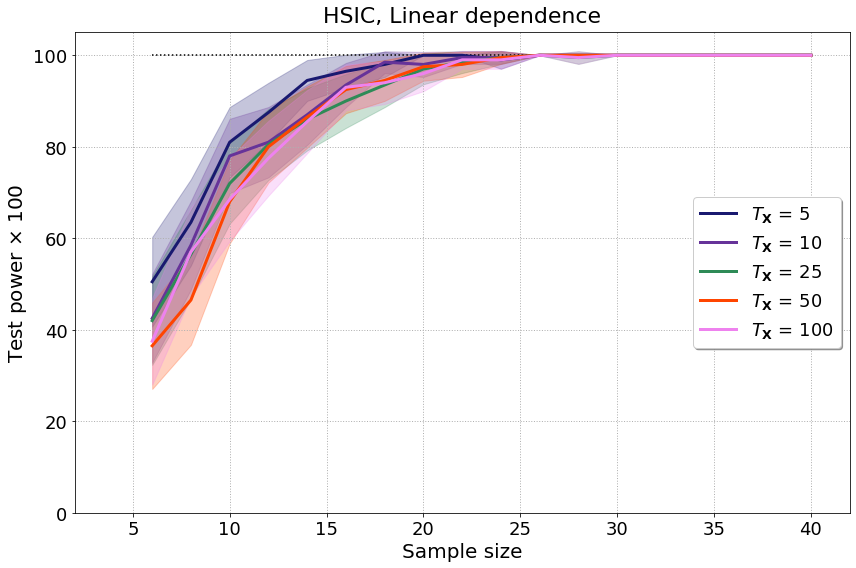

In [32]:
# define folder and file
path = 'high_HSIC'
test_ = 'p'
test__ = 'permutation' # 'permutation' # Gamma

# prepare data
file_5 = 'dependencies_{}_{}_dependence_linear'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power(dict_results_5)
dep_linear5 = power_df2_5[(power_df2_5['test']=='dependence_linear')]

file_10 = 'dependencies_{}_{}_dependence_linear'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power(dict_results_10)
dep_linear10 = power_df2_10[(power_df2_10['test']=='dependence_linear') & (power_df2_10['shift']==0)]

file_25 = 'dependencies_{}_{}_dependence_linear'.format(test_, 25)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power(dict_results_25)
dep_linear25 = power_df2_25[(power_df2_25['test']=='dependence_linear') & (power_df2_25['shift']==0)]

file_50 = 'dependencies_{}_{}_dependence_linear'.format(test_, 50)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power(dict_results_50)
dep_linear50 = power_df2_50[(power_df2_50['test']=='dependence_linear') & (power_df2_50['shift']==0)]

file_100 = 'dependencies_{}_{}_dependence_linear'.format(test_, 100)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power(dict_results_100)
dep_linear100 = power_df2_100[(power_df2_100['test']=='dependence_linear') & (power_df2_100['shift']==0)]

#plotting
plt.figure(figsize=(12, 8))
plt.xlabel(r'Sample size', size=20)
plt.ylabel(r'Test power $\times$ 100', size=20)
plt.ylim(0, 105)
plt.xlim(2, 42)
plt.hlines(y=100, xmin=6, xmax=40, colors='k', linestyles='dotted')
x25, y25 = dep_linear25['sample_size'], dep_linear25['power']
x50, y50 = dep_linear50['sample_size'], dep_linear50['power']
x100, y100 = dep_linear100['sample_size'], dep_linear100['power']

plt.title('HSIC, Linear dependence', size=22, pad=10)
plt.plot(x5, y5, 'midnightblue', lw=3) 
plt.plot(x10, y10, 'rebeccapurple', lw=3) 
plt.plot(x25, y25, 'seagreen', lw=3) 
plt.plot(x50, y50, 'orangered', lw=3) 
plt.plot(x100, y100, 'violet', lw=3)

# error bars
error_5 = confidence(y5)
error_10 = confidence(y10)
error_25 = confidence(y25)
error_50 = confidence(y50)
error_100 = confidence(y100)
plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x10, y10-error_10, y10+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x25, y25-error_25, y25+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x50, y50-error_50, y50+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x100, y100-error_100, y100+error_100, interpolate=True, alpha=0.25, color='violet')

plt.legend(['$T_{\mathbf{X}}$ = 5', '$T_{\mathbf{X}}$ = 10', '$T_{\mathbf{X}}$ = 25', '$T_{\mathbf{X}}$ = 50', '$T_{\mathbf{X}}$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

plt.savefig('visuals/{}_{}_higher_T.png'.format(dep_linear25.test.unique(), test_))
plt.show()

## Dependence by shared second basis function coefficient

In [33]:
# comparison results
path = 'comparison_results/kerpy/results'
test_ = 'sharedcoeff'
file = 'dependencies_spectral_{}'.format(test_)
file_rff = 'dependencies_spectral_{}_rff'.format(test_)
dict_results = pickle.load(open('{}/{}.pkl'.format(path, file), 'rb'))
dict_results_rff = pickle.load(open('{}/{}.pkl'.format(path, file_rff), 'rb'))

In [34]:
def power_compare(dict_results): 
    power = {}
    rejections = {}
    
    for dim in dict_results.keys():
        #print(dim)
        power[dim] = {}
        rejections[dim] = {}
        for sample_size in dict_results[dim].keys():
            rejections[dim][sample_size] = 0
            for i in range(len(dict_results[dim][sample_size])):
                if dict_results[dim][sample_size][i] < 0.05:
                    rejections[dim][sample_size] += 1
                else:
                    pass
            # statistical power
            power[dim][sample_size] = 100 * rejections[dim][sample_size] / len(dict_results[dim][sample_size])
    
    return power

In [35]:
# spectral HSIC
power_compare_hsic = power_compare(dict_results)
x_hsic_5, y_hsic_5 = list(power_compare_hsic['5'].keys()), list(power_compare_hsic['5'].values())
x_hsic_5 = [float(x) for x in x_hsic_5]
x_hsic_10, y_hsic_10 = list(power_compare_hsic['10'].keys()), list(power_compare_hsic['10'].values())
x_hsic_10 = [float(x) for x in x_hsic_10]
x_hsic_25, y_hsic_25 = list(power_compare_hsic['25'].keys()), list(power_compare_hsic['25'].values())
x_hsic_25 = [float(x) for x in x_hsic_25]
x_hsic_50, y_hsic_50 = np.array(list(power_compare_hsic['50'].keys())), np.array(list(power_compare_hsic['50'].values()))
x_hsic_50 = [float(x) for x in x_hsic_50]
x_hsic_100, y_hsic_100 = np.array(list(power_compare_hsic['100'].keys())), np.array(list(power_compare_hsic['100'].values()))
x_hsic_100 = [float(x) for x in x_hsic_100]

# spectral RFF HSIC
power_compare_rff = power_compare(dict_results_rff)
x_hsic_5_rff, y_hsic_5_rff = list(power_compare_rff['5'].keys()), list(power_compare_rff['5'].values())
x_hsic_5_rff = [float(x) for x in x_hsic_5_rff]
x_hsic_10_rff, y_hsic_10_rff = list(power_compare_rff['10'].keys()), list(power_compare_rff['10'].values())
x_hsic_10_rff = [float(x) for x in x_hsic_10_rff]
x_hsic_25_rff, y_hsic_25_rff = list(power_compare_rff['25'].keys()), list(power_compare_rff['25'].values())
x_hsic_25_rff = [float(x) for x in x_hsic_25_rff]
x_hsic_50_rff, y_hsic_50_rff = np.array(list(power_compare_rff['50'].keys())), np.array(list(power_compare_rff['50'].values()))
x_hsic_50_rff = [float(x) for x in x_hsic_50_rff]
x_hsic_100_rff, y_hsic_100_rff = np.array(list(power_compare_rff['100'].keys())), np.array(list(power_compare_rff['100'].values()))
x_hsic_100_rff = [float(x) for x in x_hsic_100_rff]

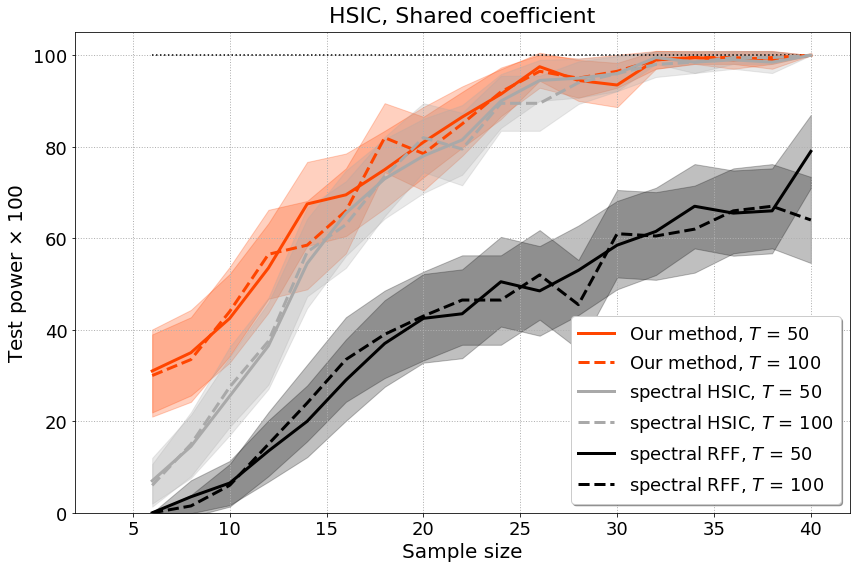

In [36]:
# define folder and file
path = 'high_HSIC'
test_ = 'p'
test__ = 'permutation' # 'permutation' # Gamma

# prepare data
file_5 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power(dict_results_5)
dep_coeff5 = power_df2_5[(power_df2_5['test']=='dependence_coeff') & (power_df2_5['shift']==0)]

file_10 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power(dict_results_10)
dep_coeff10 = power_df2_10[(power_df2_10['test']=='dependence_coeff') & (power_df2_10['shift']==0)]

file_25 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 25)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power(dict_results_25)
dep_coeff25 = power_df2_25[(power_df2_25['test']=='dependence_coeff') & (power_df2_25['shift']==0)]

file_50 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 50)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power(dict_results_50)
dep_coeff50 = power_df2_50[(power_df2_50['test']=='dependence_coeff') & (power_df2_50['shift']==0)]

file_100 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 100)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power(dict_results_100)
dep_coeff100 = power_df2_100[(power_df2_100['test']=='dependence_coeff') & (power_df2_100['shift']==0)]

#plotting
plt.figure(figsize=(12, 8))
plt.xlabel(r'Sample size', size=20)
plt.ylabel(r'Test power $\times$ 100', size=20)
plt.ylim(0, 105)
plt.xlim(2, 42)
plt.hlines(y=100, xmin=6, xmax=40, colors='k', linestyles='dotted')

x5, y5 = dep_coeff5['sample_size'], dep_coeff5['power']
x10, y10 = dep_coeff10['sample_size'], dep_coeff10['power']
x25, y25 = dep_coeff25['sample_size'], dep_coeff25['power']
x50, y50 = dep_coeff50['sample_size'], dep_coeff50['power']
x100, y100 = dep_coeff100['sample_size'], dep_coeff100['power']

plt.title(r'HSIC, Shared coefficient', size=22, pad=10)
#plt.plot(x5, y5, 'midnightblue', x10, y10, 'rebeccapurple', x25, y25, 'seagreen', x50, y50, 'orangered', 
plt.plot(x50, y50, 'orangered', lw=3, linestyle='solid')
plt.plot(x100, y100, 'orangered', lw=3, linestyle='dashed')
plt.plot(x_hsic_50, y_hsic_50, 'darkgrey', lw=3, linestyle='solid')
plt.plot(x_hsic_100, y_hsic_100, 'darkgrey', lw=3, linestyle='dashed')
plt.plot(x_hsic_50_rff, y_hsic_50_rff, 'black', lw=3, linestyle='solid')
plt.plot(x_hsic_100_rff, y_hsic_100_rff, 'black', lw=3, linestyle='dashed')

# error bars
error_50 = confidence(y50)
error_100 = confidence(y100)
error_50_hsic = confidence(y_hsic_50)
error_100_hsic = confidence(y_hsic_100)
error_50_rff = confidence(y_hsic_50_rff)
error_100_rff = confidence(y_hsic_100_rff)
plt.fill_between(x50, y50-error_50, y50+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x100, y100-error_100, y100+error_100, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_hsic_50, y_hsic_50-error_50_hsic, y_hsic_50+error_50_hsic, interpolate=True, alpha=0.25, color='darkgrey')
plt.fill_between(x_hsic_100, y_hsic_100-error_100_hsic, y_hsic_100+error_100_hsic, interpolate=True, alpha=0.25, color='darkgrey')
plt.fill_between(x_hsic_50_rff, y_hsic_50_rff-error_50_rff, y_hsic_50_rff+error_50_rff, interpolate=True, alpha=0.25, color='black')
plt.fill_between(x_hsic_100_rff, y_hsic_100_rff-error_100_rff, y_hsic_100_rff+error_100_rff, interpolate=True, alpha=0.25, color='black')


plt.legend([r'Our method, $T$ = 50', 'Our method, $T$ = 100', 'spectral HSIC, $T$ = 50', 'spectral HSIC, $T$ = 100', 'spectral RFF, $T$ = 50', 'spectral RFF, $T$ = 100'], loc=4, fontsize=18, framealpha=1, shadow=True) # 5', '10', '25', '50',
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()

plt.savefig('visuals/{}_{}_second_all.png'.format(dep_coeff5.test.unique(), test_))
plt.show()

### All dimensions in one plot

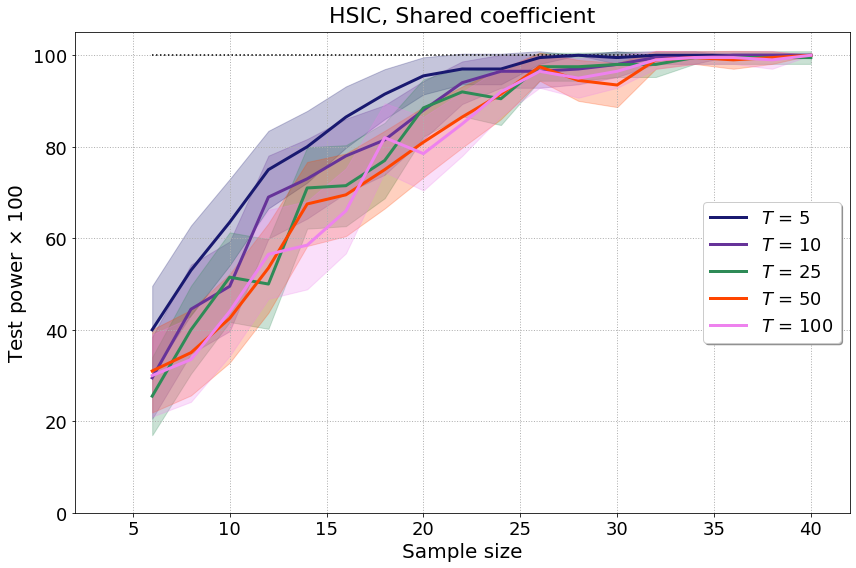

In [37]:
# define folder and file
path = 'high_HSIC'
test_ = 'p'
test__ = 'permutation' # 'permutation' # Gamma

# prepare data
file_5 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 5)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power(dict_results_5)
dep_coeff5 = power_df2_5[(power_df2_5['test']=='dependence_coeff') & (power_df2_5['shift']==0)]

file_10 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 10)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power(dict_results_10)
dep_coeff10 = power_df2_10[(power_df2_10['test']=='dependence_coeff') & (power_df2_10['shift']==0)]

file_25 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 25)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power(dict_results_25)
dep_coeff25 = power_df2_25[(power_df2_25['test']=='dependence_coeff') & (power_df2_25['shift']==0)]

file_50 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 50)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power(dict_results_50)
dep_coeff50 = power_df2_50[(power_df2_50['test']=='dependence_coeff') & (power_df2_50['shift']==0)]

file_100 = 'dependencies_{}_{}_dependence_coeff'.format(test_, 100)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power(dict_results_100)
dep_coeff100 = power_df2_100[(power_df2_100['test']=='dependence_coeff') & (power_df2_100['shift']==0)]

#plotting
plt.figure(figsize=(12, 8))
plt.xlabel(r'Sample size', size=20)
plt.ylabel(r'Test power $\times$ 100', size=20)
plt.ylim(0, 105)
plt.xlim(2, 42)
plt.hlines(y=100, xmin=6, xmax=40, colors='k', linestyles='dotted')

x5, y5 = dep_coeff5['sample_size'], dep_coeff5['power']
x10, y10 = dep_coeff10['sample_size'], dep_coeff10['power']
x25, y25 = dep_coeff25['sample_size'], dep_coeff25['power']
x50, y50 = dep_coeff50['sample_size'], dep_coeff50['power']
x100, y100 = dep_coeff100['sample_size'], dep_coeff100['power']

plt.title(r'HSIC, Shared coefficient', size=22, pad=10)
plt.plot(x5, y5, 'midnightblue', lw=3)
plt.plot(x10, y10, 'rebeccapurple', lw=3)
plt.plot(x25, y25, 'seagreen', lw=3) 
plt.plot(x50, y50, 'orangered', lw=3)
plt.plot(x100, y100, 'violet', lw=3)


# error bars
error_5 = confidence(y5)
error_10 = confidence(y10)
error_25 = confidence(y25)
error_50 = confidence(y50)
error_100 = confidence(y100)

plt.fill_between(x5, y5-error_5, y5+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x10, y10-error_10, y10+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x25, y25-error_25, y25+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x50, y50-error_50, y50+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x100, y100-error_100, y100+error_100, interpolate=True, alpha=0.25, color='violet')


plt.legend([r'$T$ = 5', '$T$ = 10', '$T$ = 25', '$T$ = 50', '$T$ = 100'], loc=7, fontsize=18, framealpha=1, shadow=True) # 5', '10', '25', '50',
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()

plt.savefig('visuals/{}_{}_second_all_T.png'.format(dep_coeff5.test.unique(), test_))
plt.show()

## Test power maximisation

In [38]:
# define folder and file
path = 'high_HSIC'

# all in one file
#file = 'dependencies_p_50_100_dependence_coeff_max'
#dict_results_max = pickle.load(open('{}/{}.pkl'.format(path, file), 'rb'))

# in separate files
file_50 = 'dependencies_p_50_dependence_coeff_max'
dict_results_max_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))

file_100 = 'dependencies_p_100_dependence_coeff_max'
dict_results_max_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))

In [39]:
# only necessary if all in one file
dict_results_50 = {}
dict_results_100 = {}

for key, value in dict_results_max.items():
    if key[0]==50:
        dict_results_50[key] = value
    elif key[0]==100:
        dict_results_100[key] = value

In [40]:
def power_coeff(dict_results): 
    power = {}
    rejections = {}

    for key in dict_results.keys():
        #print(key)
        rejections[key] = 0
        for i in range(len(dict_results[key])):
            if dict_results[key][i][0] > dict_results[key][i][1]:
                rejections[key] += 1
            else:
                pass
        # statistical power
        power[key] = 100 * rejections[key] / len(dict_results[key])
    
    power_df = pd.DataFrame.from_dict(data=power, orient='index').reset_index()
    power_df0 = power_df['index'].apply(pd.Series)
    power_df1 = pd.concat([power_df0, power_df], axis=1, ignore_index=True).drop([2], axis=1)
    power_df2 = power_df1.rename(columns={0: 'dimension', 1: 'sample_size', 3: 'power'}).sort_values(by=['sample_size'], axis=0)
   
    return power_df2

In [41]:
power_df2_50 = power_coeff(dict_results_max_50)
power_df2_100 = power_coeff(dict_results_max_100)

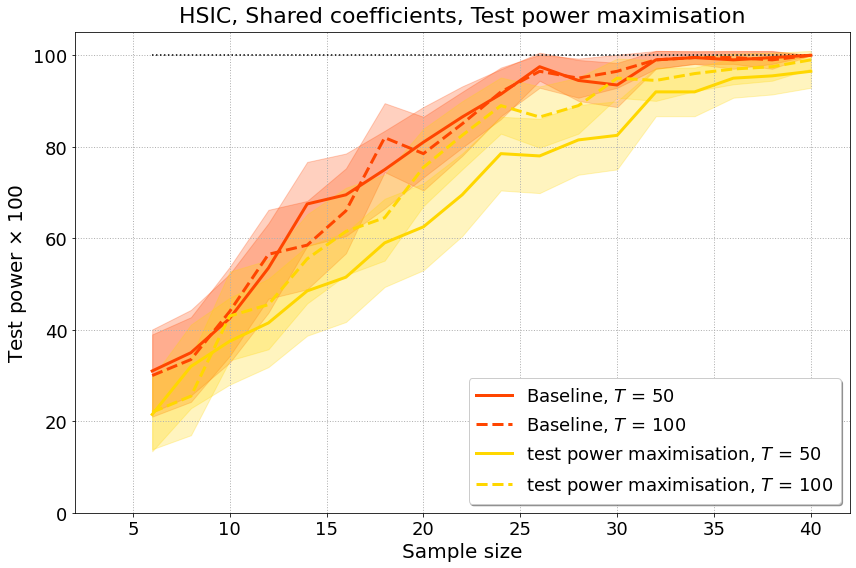

In [42]:
# plotting
plt.figure(figsize=(12, 8))
plt.xlabel(r'Sample size', size=20)
plt.ylabel(r'Test power $\times$ 100', size=20)
plt.ylim(0, 105)
plt.xlim(2, 42)
plt.hlines(y=100, xmin=6, xmax=40, colors='k', linestyles='dotted')

# baseline results
x50, y50 = dep_coeff50['sample_size'], dep_coeff50['power']
x100, y100 = dep_coeff100['sample_size'], dep_coeff100['power']

# max test power results
x50_max, y50_max = power_df2_50['sample_size'], power_df2_50['power']
x100_max, y100_max = power_df2_100['sample_size'], power_df2_100['power']

plt.title(r'HSIC, Shared coefficients, Test power maximisation', size=22, pad=10)
plt.plot(x50, y50, 'orangered', lw=3, linestyle='solid')
plt.plot(x100, y100, 'orangered', lw=3, linestyle='dashed')
plt.plot(x50_max, y50_max, 'gold', lw=3, linestyle='solid')
plt.plot(x100_max, y100_max, 'gold', lw=3, linestyle='dashed')

# error bars
error_50 = confidence(y50)
error_100 = confidence(y100)
error_50_max = confidence(y50_max)
error_100_max = confidence(y100_max)

plt.fill_between(x50, y50-error_50, y50+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x100, y100-error_100, y100+error_100, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x50_max, y50_max-error_50_max, y50_max+error_50_max, interpolate=True, alpha=0.25, color='gold')
plt.fill_between(x100_max, y100_max-error_100_max, y100_max+error_100_max, interpolate=True, alpha=0.25, color='gold')

plt.legend(['Baseline, $T$ = 50', 'Baseline, $T$ = 100', 'test power maximisation, $T$ = 50', 'test power maximisation, $T$ = 100'], loc=4, fontsize=18, framealpha=1, shadow=True) # 5', '10', '25', '50',
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid(True, linestyle=':', linewidth=1)

#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()

plt.savefig('visuals/{}_{}_second_all_max.png'.format(dep_coeff5.test.unique(), test_))
plt.show()

# Dependence through rotations

### Includes test power maximisation

In [43]:
# define folder and file
path = 'high_HSIC'
test_ = 'p'  # 'p' g
test__ = 'permutation' # 'permutation'

# example
dim = 100
sample_size = 100
file = 'dependencies_{}_{}_dependence_rotation_{}'.format(test_, dim, sample_size)
dict_results = pickle.load(open('{}/{}.pkl'.format(path, file), 'rb'))

In [44]:
def power_rotation(dict_results):
    power = {}
    rejections = {}

    for key in dict_results.keys():
        #print(key)
        rejections[key] = 0
        for i in range(len(dict_results[key])):
            if dict_results[key][i][0] > dict_results[key][i][1]:
                rejections[key] += 1
            else:
                pass
        # statistical power
        power[key] = 100 * rejections[key] / len(dict_results[key])
    
    power_df = pd.DataFrame.from_dict(data=power, orient='index').reset_index()
    power_df0 = power_df['index'].apply(pd.Series)
    power_df1 = pd.concat([power_df0, power_df], axis=1, ignore_index=True).drop([4], axis=1)
    power_df2 = power_df1.rename(columns={0: 'dimension', 1: 'sample_size', 2: 'angle', 3: 'dist', 5: 'power'}).sort_values(by=['sample_size', 'angle'], axis=0)
    
    return power_df2

In [45]:
# prepare results of maximisation
path = 'high_HSIC/max'
test_ = 'p'  # 'p' g

# prepare data
distribution = 'exp'
file_1 = 'dependencies_{}_{}_dependence_rotation_{}_max_1'.format(test_, 100, distribution)
dict_results_1 = pickle.load(open('{}/{}.pkl'.format(path, file_1), 'rb'))
file_2 = 'dependencies_{}_{}_dependence_rotation_{}_max_2'.format(test_, 100, distribution)
dict_results_2 = pickle.load(open('{}/{}.pkl'.format(path, file_2), 'rb'))
file_3 = 'dependencies_{}_{}_dependence_rotation_{}_max_3'.format(test_, 100, distribution)
dict_results_3 = pickle.load(open('{}/{}.pkl'.format(path, file_3), 'rb'))
file_4 = 'dependencies_{}_{}_dependence_rotation_{}_max_4'.format(test_, 100, distribution)
dict_results_4 = pickle.load(open('{}/{}.pkl'.format(path, file_4), 'rb'))
dict_exp = {**dict_results_1, **dict_results_2, **dict_results_3, **dict_results_4}

distribution = 'studentt'
file_1 = 'dependencies_{}_{}_dependence_rotation_{}_max_1'.format(test_, 100, distribution)
dict_results_1 = pickle.load(open('{}/{}.pkl'.format(path, file_1), 'rb'))
file_2 = 'dependencies_{}_{}_dependence_rotation_{}_max_2'.format(test_, 100, distribution)
dict_results_2 = pickle.load(open('{}/{}.pkl'.format(path, file_2), 'rb'))
file_3 = 'dependencies_{}_{}_dependence_rotation_{}_max_3'.format(test_, 100, distribution)
dict_results_3 = pickle.load(open('{}/{}.pkl'.format(path, file_3), 'rb'))
file_4 = 'dependencies_{}_{}_dependence_rotation_{}_max_4'.format(test_, 100, distribution)
dict_results_4 = pickle.load(open('{}/{}.pkl'.format(path, file_4), 'rb'))
dict_studentt = {**dict_results_1, **dict_results_2, **dict_results_3, **dict_results_4}

distribution = 'uniform'
file_1 = 'dependencies_{}_{}_dependence_rotation_{}_max_1'.format(test_, 100, distribution)
dict_results_1 = pickle.load(open('{}/{}.pkl'.format(path, file_1), 'rb'))
file_2 = 'dependencies_{}_{}_dependence_rotation_{}_max_2'.format(test_, 100, distribution)
dict_results_2 = pickle.load(open('{}/{}.pkl'.format(path, file_2), 'rb'))
file_3 = 'dependencies_{}_{}_dependence_rotation_{}_max_3'.format(test_, 100, distribution)
dict_results_3 = pickle.load(open('{}/{}.pkl'.format(path, file_3), 'rb'))
file_4 = 'dependencies_{}_{}_dependence_rotation_{}_max_4'.format(test_, 100, distribution)
dict_results_4 = pickle.load(open('{}/{}.pkl'.format(path, file_4), 'rb'))
dict_uniform = {**dict_results_1, **dict_results_2, **dict_results_3, **dict_results_4}

In [46]:
path = 'high_HSIC'
test_ = 'p'  # 'p' g
sample_size = 200

# prepare data
file_5 = 'dependencies_{}_{}_dependence_rotation_{}'.format(test_, 5, sample_size)
dict_results_5 = pickle.load(open('{}/{}.pkl'.format(path, file_5), 'rb'))
power_df2_5 = power_rotation(dict_results_5)
dep_rot5_uni = power_df2_5[power_df2_5['dist']=='uniform']
dep_rot5_exp = power_df2_5[power_df2_5['dist']=='exp']
dep_rot5_t = power_df2_5[power_df2_5['dist']=='studentt']

file_10 = 'dependencies_{}_{}_dependence_rotation_{}'.format(test_, 10, sample_size)
dict_results_10 = pickle.load(open('{}/{}.pkl'.format(path, file_10), 'rb'))
power_df2_10 = power_rotation(dict_results_10)
dep_rot10_uni = power_df2_10[power_df2_10['dist']=='uniform']
dep_rot10_exp = power_df2_10[power_df2_10['dist']=='exp']
dep_rot10_t = power_df2_10[power_df2_10['dist']=='studentt']

file_25 = 'dependencies_{}_{}_dependence_rotation_{}'.format(test_, 25, sample_size)
dict_results_25 = pickle.load(open('{}/{}.pkl'.format(path, file_25), 'rb'))
power_df2_25 = power_rotation(dict_results_25)
dep_rot25_uni = power_df2_25[power_df2_25['dist']=='uniform']
dep_rot25_exp = power_df2_25[power_df2_25['dist']=='exp']
dep_rot25_t = power_df2_25[power_df2_25['dist']=='studentt']

file_50 = 'dependencies_{}_{}_dependence_rotation_{}'.format(test_, 50, sample_size)
dict_results_50 = pickle.load(open('{}/{}.pkl'.format(path, file_50), 'rb'))
power_df2_50 = power_rotation(dict_results_50)
dep_rot50_uni = power_df2_50[power_df2_50['dist']=='uniform']
dep_rot50_exp = power_df2_50[power_df2_50['dist']=='exp']
dep_rot50_t = power_df2_50[power_df2_50['dist']=='studentt']

file_100 = 'dependencies_{}_{}_dependence_rotation_{}'.format(test_, 100, sample_size)
dict_results_100 = pickle.load(open('{}/{}.pkl'.format(path, file_100), 'rb'))
power_df2_100 = power_rotation(dict_results_100)
dep_rot100_uni = power_df2_100[power_df2_100['dist']=='uniform']
dep_rot100_exp = power_df2_100[power_df2_100['dist']=='exp']
dep_rot100_t = power_df2_100[power_df2_100['dist']=='studentt']


dep_rot100_exp_max = power_rotation(dict_exp)
dep_rot100_uni_max = power_rotation(dict_uniform)
dep_rot100_t_max = power_rotation(dict_studentt)

In [47]:
x_5_uni, y_5_uni = np.radians(list(dep_rot5_uni['angle'])) / (np.pi/4), np.array(list(dep_rot5_uni['power']))
x_5_exp, y_5_exp = np.radians(list(dep_rot5_exp['angle'])) / (np.pi/4), np.array(list(dep_rot5_exp['power']))
x_5_t, y_5_t = np.radians(list(dep_rot5_t['angle'])) / (np.pi/4), np.array(list(dep_rot5_t['power']))

x_10_uni, y_10_uni = np.radians(list(dep_rot10_uni['angle'])) / (np.pi/4), np.array(list(dep_rot10_uni['power']))
x_10_exp, y_10_exp = np.radians(list(dep_rot10_exp['angle'])) / (np.pi/4), np.array(list(dep_rot10_exp['power']))
x_10_t, y_10_t = np.radians(list(dep_rot10_t['angle'])) / (np.pi/4), np.array(list(dep_rot10_t['power']))

x_25_uni, y_25_uni = np.radians(list(dep_rot25_uni['angle'])) / (np.pi/4), np.array(list(dep_rot25_uni['power']))
x_25_exp, y_25_exp = np.radians(list(dep_rot25_exp['angle'])) / (np.pi/4), np.array(list(dep_rot25_exp['power']))
x_25_t, y_25_t = np.radians(list(dep_rot25_t['angle'])) / (np.pi/4), np.array(list(dep_rot25_t['power']))

x_50_uni, y_50_uni = np.radians(list(dep_rot50_uni['angle'])) / (np.pi/4), np.array(list(dep_rot50_uni['power']))
x_50_exp, y_50_exp = np.radians(list(dep_rot50_exp['angle'])) / (np.pi/4), np.array(list(dep_rot50_exp['power']))
x_50_t, y_50_t = np.radians(list(dep_rot50_t['angle'])) / (np.pi/4), np.array(list(dep_rot50_t['power']))

x_100_uni, y_100_uni = np.radians(list(dep_rot100_uni['angle'])) / (np.pi/4), np.array(list(dep_rot100_uni['power']))
x_100_exp, y_100_exp = np.radians(list(dep_rot100_exp['angle'])) / (np.pi/4), np.array(list(dep_rot100_exp['power']))
x_100_t, y_100_t = np.radians(list(dep_rot100_t['angle'])) / (np.pi/4), np.array(list(dep_rot100_t['power']))


x_100_uni_max, y_100_uni_max = np.radians(list(dep_rot100_uni_max['angle'])) / (np.pi/4), np.array(list(dep_rot100_uni_max['power']))
x_100_exp_max, y_100_exp_max = np.radians(list(dep_rot100_exp_max['angle'])) / (np.pi/4), np.array(list(dep_rot100_exp_max['power']))
x_100_t_max, y_100_t_max = np.radians(list(dep_rot100_t_max['angle'])) / (np.pi/4), np.array(list(dep_rot100_t_max['power']))
x_100_t_max, y_100_t_max = np.radians(list(dep_rot100_t_max['angle'])) / (np.pi/4), np.array(list(dep_rot100_t_max['power']))

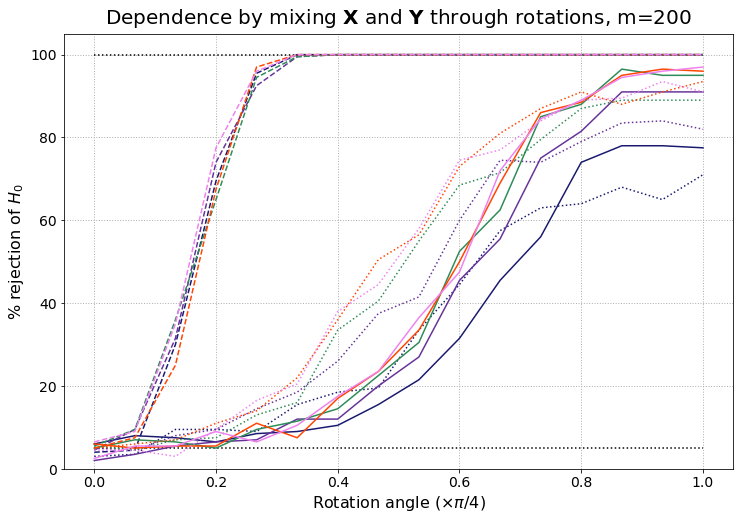

In [48]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'Rotation angle ($\times \pi/4$)', size=16)
plt.ylabel(r'$\%$ rejection of $H_0$', size=16)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=1, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=1, colors='k', linestyles='dotted')

# results
plt.plot(x_5_uni, y_5_uni, 'midnightblue', linestyle='solid')
plt.plot(x_5_exp, y_5_exp, 'midnightblue', linestyle='dashed')
plt.plot(x_5_t, y_5_t, 'midnightblue', linestyle='dotted')

plt.plot(x_10_uni, y_10_uni, 'rebeccapurple', linestyle='solid')
plt.plot(x_10_exp, y_10_exp, 'rebeccapurple', linestyle='dashed')
plt.plot(x_10_t, y_10_t, 'rebeccapurple', linestyle='dotted')

plt.plot(x_25_uni, y_25_uni, 'seagreen', linestyle='solid')
plt.plot(x_25_exp, y_25_exp, 'seagreen', linestyle='dashed')
plt.plot(x_25_t, y_25_t, 'seagreen', linestyle='dotted')

plt.plot(x_50_uni, y_50_uni, 'orangered', linestyle='solid')
plt.plot(x_50_exp, y_50_exp, 'orangered', linestyle='dashed')
plt.plot(x_50_t, y_50_t, 'orangered', linestyle='dotted')

plt.plot(x_100_uni, y_100_uni, 'violet', linestyle='solid')
plt.plot(x_100_exp, y_100_exp, 'violet', linestyle='dashed')
plt.plot(x_100_t, y_100_t, 'violet', linestyle='dotted')

plt.title(r'Dependence by mixing $\mathbf{X}$ and $\mathbf{Y}$ through rotations, m=200', size=20, pad=10)
plt.yticks(size=14)
plt.xticks(size=14)
plt.grid(True, linestyle=':', linewidth=1)

# custom legend
custom_legend = [Line2D([0], [0], color='midnightblue', lw=2, linestyle='solid'),
                 Line2D([0], [0], color='rebeccapurple', lw=2, linestyle='solid'),
                 Line2D([0], [0], color='seagreen', lw=2, linestyle='solid'),
                 Line2D([0], [0], color='orangered', lw=2, linestyle='solid'),
                 Line2D([0], [0], color='violet', lw=2, linestyle='solid'),
                 Line2D([0], [0], color='k', lw=2, linestyle='dashed'),
                 Line2D([0], [0], color='k', lw=2, linestyle='dotted'),
                 Line2D([0], [0], color='k', lw=2, linestyle='solid')]

#os.chdir('..')
#print(os.getcwd())

plt.savefig("visuals/['dependence_rotation']_{}_{}_all.png".format(test_, sample_size))

plt.show()

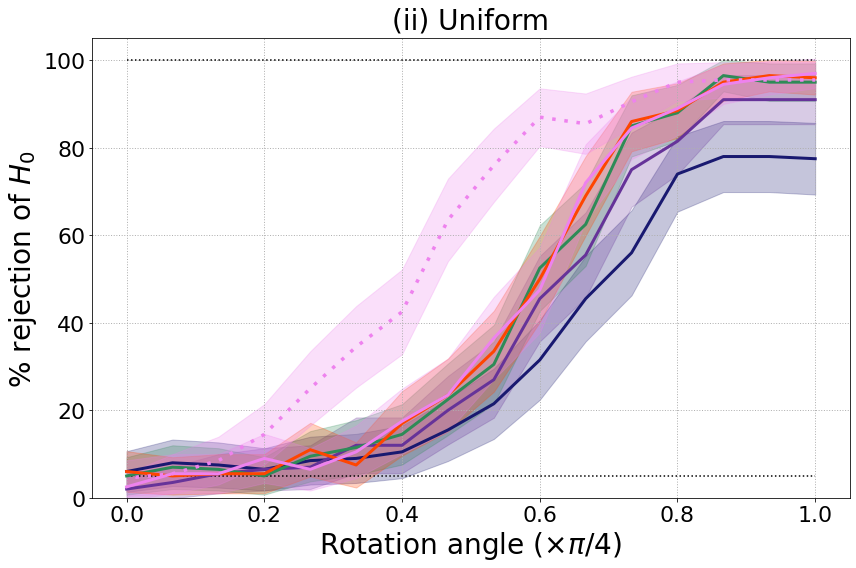

In [49]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'Rotation angle ($\times \pi/4$)', size=28)
plt.ylabel(r'$\%$ rejection of $H_0$', size=28)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=1, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=1, colors='k', linestyles='dotted')

# results
plt.plot(x_5_uni, y_5_uni, 'midnightblue', lw=3, linestyle='solid')

plt.plot(x_10_uni, y_10_uni, 'rebeccapurple', lw=3, linestyle='solid')

plt.plot(x_25_uni, y_25_uni, 'seagreen', lw=3, linestyle='solid')

plt.plot(x_50_uni, y_50_uni, 'orangered', lw=3, linestyle='solid')

plt.plot(x_100_uni, y_100_uni, 'violet', lw=3, linestyle='solid')

plt.plot(x_100_uni_max, y_100_uni_max, 'violet', lw=3.5, linestyle=(1, (1, 2.5)))

# error bars
error_5 = confidence(y_5_uni)
error_10 = confidence(y_10_uni)
error_25 = confidence(y_25_uni)
error_50 = confidence(y_50_uni)
error_100 = confidence(y_100_uni)
error_100_max = confidence(y_100_uni_max)
plt.fill_between(x_5_uni, y_5_uni-error_5, y_5_uni+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_10_uni, y_10_uni-error_10, y_10_uni+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x_25_uni, y_25_uni-error_25, y_25_uni+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_50_uni, y_50_uni-error_50, y_50_uni+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_100_uni, y_100_uni-error_100, y_100_uni+error_100, interpolate=True, alpha=0.25, color='violet')
plt.fill_between(x_100_uni_max, y_100_uni_max-error_100_max, y_100_uni_max+error_100_max, interpolate=True, alpha=0.25, color='violet')

plt.title(r'(ii) Uniform', size=28, pad=10)
plt.yticks(size=22)
plt.xticks(size=22)
plt.grid(True, linestyle=':', linewidth=1)

#plt.legend(['points in time = 5', '10', '25', '50', '100'], loc=4, fontsize=14, framealpha=1, shadow=True) # '100 max'

#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()

plt.savefig("visuals/['dependence_rotation']_{}_{}_uniform.png".format(test_, sample_size))

plt.show()

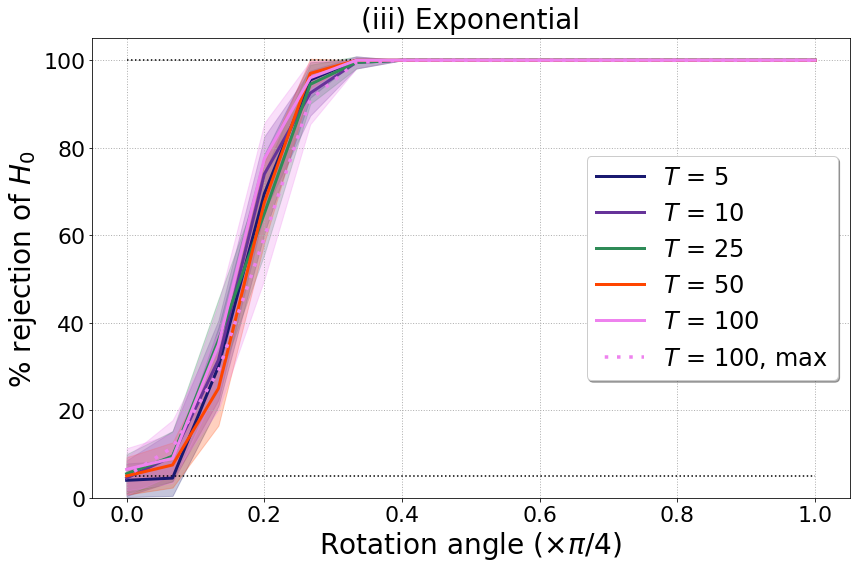

In [50]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'Rotation angle ($\times \pi/4$)', size=28)
plt.ylabel(r'$\%$ rejection of $H_0$', size=28)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=1, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=1, colors='k', linestyles='dotted')

# results
plt.plot(x_5_exp, y_5_exp, 'midnightblue', lw=3, linestyle='solid')

plt.plot(x_10_exp, y_10_exp, 'rebeccapurple', lw=3, linestyle='solid')

plt.plot(x_25_exp, y_25_exp, 'seagreen', lw=3, linestyle='solid')

plt.plot(x_50_exp, y_50_exp, 'orangered', lw=3, linestyle='solid')

plt.plot(x_100_exp, y_100_exp, 'violet', lw=3, linestyle='solid')

plt.plot(x_100_exp_max, y_100_exp_max, 'violet', lw=3.5, linestyle=(1, (1, 2.5)))

# error bars
error_5 = confidence(y_5_exp)
error_10 = confidence(y_10_exp)
error_25 = confidence(y_25_exp)
error_50 = confidence(y_50_exp)
error_100 = confidence(y_100_exp)
error_100_max = confidence(y_100_exp_max)
plt.fill_between(x_5_exp, y_5_exp-error_5, y_5_exp+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_10_exp, y_10_exp-error_10, y_10_exp+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x_25_exp, y_25_exp-error_25, y_25_exp+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_50_exp, y_50_exp-error_50, y_50_exp+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_100_exp, y_100_exp-error_100, y_100_exp+error_100, interpolate=True, alpha=0.25, color='violet')
plt.fill_between(x_100_exp_max, y_100_exp_max-error_100_max, y_100_exp_max+error_100_max, interpolate=True, alpha=0.25, color='violet')

plt.title(r'(iii) Exponential', size=28, pad=10)
plt.yticks(size=22)
plt.xticks(size=22)
plt.grid(True, linestyle=':', linewidth=1)

plt.legend([r'$T$ = 5', '$T$ = 10', '$T$ = 25', '$T$ = 50', '$T$ = 100', '$T$ = 100, max'], loc=7, fontsize=24, framealpha=1, shadow=True) # , '100 max'

#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()

plt.savefig("visuals/['dependence_rotation']_{}_{}_exponential.png".format(test_, sample_size))

plt.show()

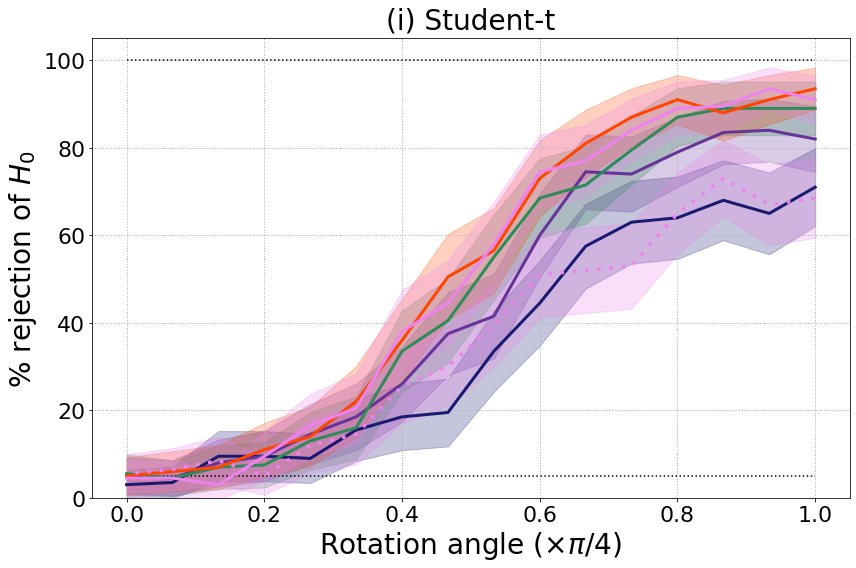

In [51]:
plt.figure(figsize=(12, 8))
plt.xlabel(r'Rotation angle ($\times \pi/4$)', size=28)
plt.ylabel(r'$\%$ rejection of $H_0$', size=28)
plt.ylim(0, 105)
plt.hlines(y=100, xmin=0, xmax=1, colors='k', linestyles='dotted')
plt.hlines(y=5, xmin=0, xmax=1, colors='k', linestyles='dotted')

# results
plt.plot(x_5_t, y_5_t, 'midnightblue', lw=3, linestyle='solid')

plt.plot(x_10_t, y_10_t, 'rebeccapurple', lw=3, linestyle='solid')

plt.plot(x_25_t, y_25_t, 'seagreen', lw=3, linestyle='solid')

plt.plot(x_50_t, y_50_t, 'orangered', lw=3, linestyle='solid')

plt.plot(x_100_t, y_100_t, 'violet', lw=3, linestyle='solid')

plt.plot(x_100_t_max, y_100_t_max, 'violet', lw=3.5, linestyle=(1, (1, 2.5)))

# error bars
error_5 = confidence(y_5_t)
error_10 = confidence(y_10_t)
error_25 = confidence(y_25_t)
error_50 = confidence(y_50_t)
error_100 = confidence(y_100_t)
error_100_max = confidence(y_100_t_max)
plt.fill_between(x_5_t, y_5_t-error_5, y_5_t+error_5, interpolate=True, alpha=0.25, color='midnightblue')
plt.fill_between(x_10_t, y_10_t-error_10, y_10_t+error_10, interpolate=True, alpha=0.25, color='rebeccapurple')
plt.fill_between(x_25_t, y_25_t-error_25, y_25_t+error_25, interpolate=True, alpha=0.25, color='seagreen')
plt.fill_between(x_50_t, y_50_t-error_50, y_50_t+error_50, interpolate=True, alpha=0.25, color='orangered')
plt.fill_between(x_100_t, y_100_t-error_100, y_100_t+error_100, interpolate=True, alpha=0.25, color='violet')
plt.fill_between(x_100_t_max, y_100_t_max-error_100_max, y_100_t_max+error_100_max, interpolate=True, alpha=0.25, color='violet')

plt.title(r'(i) Student-t', size=28, pad=10)
plt.yticks(size=22)
plt.xticks(size=22)
plt.grid(True, linestyle=':', linewidth=1)

#plt.legend(['points in time = 5', '10', '25', '50', '100'], loc=4, fontsize=14, framealpha=1, shadow=True)

#os.chdir('..')
#print(os.getcwd())
plt.tight_layout()

plt.savefig("visuals/['dependence_rotation']_{}_{}_studentt.png".format(test_, sample_size))

plt.show()